# Project: Used Car Price Prediction using Linear Regression 
       
The goal of this project is to predict the used car price based on various features.
Dataset to downloaded from the below link:
https://www.kaggle.com/datasets/ananaymital/us-used-cars-dataset

## Part1: Data Exploration

In [3]:
import time
import numpy as np
import pandas as pd
import scipy.sparse as sp

start = time.time()
# read in the dataset
pd.pandas.set_option('display.max_columns', None)
df = pd.read_csv('used_cars_data.csv')

print("Time taken to read dataset: %f seconds" % (time.time()-start))

print("The first five rows of dataset:")
df.head()


/Users/jingshu/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Time taken to read dataset: 104.365470 seconds
The first five rows of dataset:


,vin,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,city_fuel_economy,combine_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_certified,is_cpo,is_new,is_oemcpo,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,owner_count,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,vehicle_damage_category,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,NaN,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,NaN,177.0,Black,NaN,NaN,NaN,True,NaN,18.3988,166.6 in,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,7.0,Renegade,NaN,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,NaN,FWD,Front-Wheel Drive,101.2 in,79.6 in,2019
1,SALCJ2FX1LH858117,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,8.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020
2,JF1VA2M67G9829723,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,17.0,NaN,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,23.0,305.0,None,False,NaN,NaN,False,NaN,18.3467,180.9 in,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,NaN,WRX STI,3.0,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,NaN,AWD,All-Wheel Drive,104.3 in,78.9 in,2016
3,SALRR2RV0L2433391,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,True,NaN,18.4439,195.1 in,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,11.0,Discovery,NaN,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,NaN,AWD,All-Wheel Drive,115 in,87.4 in,2020
4,SALCJ2FXXLH862327,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,NaN,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,NaN,246.0,Black (Ebony),NaN,NaN,NaN,True,NaN,18.4439,181 in,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,7.0,Discovery Sport,NaN,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,NaN,AWD,All-Wheel Drive,107.9 in,85.6 in,2020


### Drop Duplicate values

In [4]:
# Remove rows with duplicate vehicle id numbers

# df2 = df.drop_duplicates(subset=["vin"])

print("The size of original dataset: %d * %d" %(df.shape[0], df.shape[1]))
# print("The size of dataset after dropping duplicate vin: %d * %d" %(df2.shape[0], df2.shape[1]))


The size of original dataset: 3000040 * 66


### Missing values

In [5]:
## check the percentage of nan values present in each feature

## step1: make the list of features which has missing values
features_with_nan = [features for features in df.columns if df[features].isnull().sum()>1]
print('features with nan values: ', len(features_with_nan))

## step2: print the feature name and the percentage of missing values
nan_percentage = []
print('missing values percentage\n --------------------')
for feature in features_with_nan:
    percentage = np.round(df[feature].isnull().mean()*100, 2)
    nan_percentage.append(percentage)
    print(feature, ': ', percentage, '%')


features with nan values:  49
missing values percentage
 --------------------
back_legroom :  5.31 %
bed :  99.35 %
bed_height :  85.7 %
bed_length :  85.7 %
body_type :  0.45 %
cabin :  97.88 %
city_fuel_economy :  16.38 %
combine_fuel_economy :  100.0 %
description :  2.6 %
engine_cylinders :  3.35 %
engine_displacement :  5.75 %
engine_type :  3.35 %
exterior_color :  0.0 %
fleet :  47.55 %
frame_damaged :  47.55 %
franchise_make :  19.09 %
front_legroom :  5.31 %
fuel_tank_volume :  5.31 %
fuel_type :  2.76 %
has_accidents :  47.55 %
height :  5.31 %
highway_fuel_economy :  16.38 %
horsepower :  5.75 %
interior_color :  0.01 %
isCab :  47.55 %
is_certified :  100.0 %
is_cpo :  93.9 %
is_oemcpo :  95.49 %
length :  5.31 %
main_picture_url :  12.3 %
major_options :  6.67 %
maximum_seating :  5.31 %
mileage :  4.81 %
owner_count :  50.57 %
power :  16.05 %
salvage :  47.55 %
seller_rating :  1.36 %
sp_id :  0.0 %
theft_title :  47.55 %
torque :  17.26 %
transmission :  2.14 %
transmis

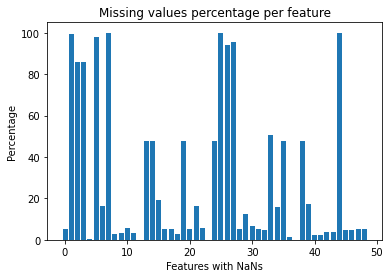

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

x = [i for i in range(len(nan_percentage))]
plt.bar(x,nan_percentage)
plt.xlabel('Features with NaNs')
plt.ylabel('Percentage')
plt.title("Missing values percentage per feature")
plt.show()

In [7]:
## step3: dropping features with nan_percentage >= 50%

features_with_na = []
na_percentage = []
drop_list = []
for i, percentage in enumerate(nan_percentage):
    if percentage < 50.0:
        features_with_na.append(features_with_nan[i])
        na_percentage.append(percentage)
    else:
        drop_list.append(features_with_nan[i])
        
print("Dropping features with nan_percentage >= 50% :", len(drop_list),'\n' ,drop_list)

# dropping features with nan_percentage >= 50%
dataset = df.drop(drop_list, axis=1)

print("\nnew dataset size: %d * %d" %(dataset.shape[0], dataset.shape[1]) )


Dropping features with nan_percentage >= 50% : 10 
 ['bed', 'bed_height', 'bed_length', 'cabin', 'combine_fuel_economy', 'is_certified', 'is_cpo', 'is_oemcpo', 'owner_count', 'vehicle_damage_category']

new dataset size: 3000040 * 56


### numerical variables

In [8]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  20


,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,franchise_dealer,highway_fuel_economy,horsepower,is_certified,is_new,latitude,listing_id,longitude,mileage,owner_count,price,savings_amount,seller_rating,sp_id,vehicle_damage_category,year
0,NaN,NaN,522,1300.0,True,NaN,177.0,NaN,True,18.3988,237132766,-66.1582,7.0,NaN,23141.0,0,2.8,370599.0,NaN,2019
1,NaN,NaN,207,2000.0,True,NaN,246.0,NaN,True,18.4439,265946296,-66.0785,8.0,NaN,46500.0,0,3.0,389227.0,NaN,2020
2,17.0,NaN,1233,2500.0,True,23.0,305.0,NaN,False,18.3467,173473508,-66.1098,NaN,3.0,46995.0,0,NaN,370467.0,NaN,2016
3,NaN,NaN,196,3000.0,True,NaN,340.0,NaN,True,18.4439,266911050,-66.0785,11.0,NaN,67430.0,0,3.0,389227.0,NaN,2020
4,NaN,NaN,137,2000.0,True,NaN,246.0,NaN,True,18.4439,270957414,-66.0785,7.0,NaN,48880.0,0,3.0,389227.0,NaN,2020


year:
 [1915, 1921, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
samples of each year:
 [4, 2, 13, 2, 3, 9, 6, 11, 22, 24, 18, 21, 2, 3, 3, 5, 11, 11, 16, 32, 25, 2, 4, 21, 30, 25, 27, 26, 19, 34, 44, 102, 67, 128, 33, 41, 49, 53, 76, 95, 133, 195, 221, 228, 180, 263, 231, 138, 164, 141, 82, 79, 122, 97, 138, 149, 86, 99, 99, 113, 135, 150, 209, 223, 227, 264, 214, 280, 277, 353, 511, 614, 630, 992, 1178, 1914, 2685, 3509, 5332, 7444, 10157, 12695, 16581, 22870, 27

Text(0.5, 1.0, 'Price vs Year')

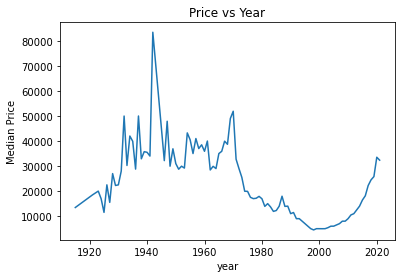

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# 
years = list(df['year'])
year_list = list(set(years))
print('year:\n', year_list)

year_cnt = [ 0 for i in range(len(year_list))]
for i, y in enumerate(year_list):
    year_cnt[i] = years.count(y)

print('samples of each year:\n', year_cnt)

# check whether there is a relation between year and the price
df.groupby('year')['price'].median().plot()
plt.xlabel('year')
plt.ylabel('Median Price')
plt.title("Price vs Year")


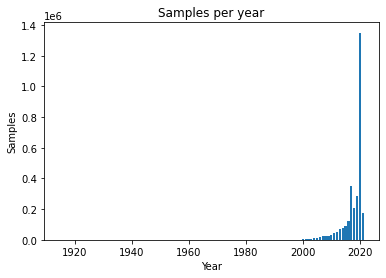

In [10]:
plt.bar(year_list,year_cnt)
plt.xlabel('Year')
plt.ylabel('Samples')
plt.title("Samples per year")
plt.show()

In [11]:
# year distribution
start = 1995
start_index = year_list.index(start)
print("Start index:", start_index)
start_cnt = sum(year_cnt[0:start_index+1])
print("Start count:", start_cnt)

Start index: 71
Start count: 7534


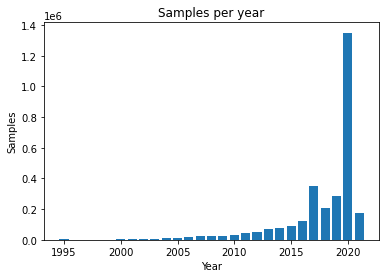

In [12]:
x = [start]
for yr in year_list[start_index+1:]:
    x.append(yr)
y = [start_cnt]
for cnt in year_cnt[start_index+1:]:
    y.append(cnt)

plt.bar(x,y)
plt.xlabel('Year')
plt.ylabel('Samples')
plt.title("Samples per year")
plt.show()

In [13]:
 len(set(year_list))

98

In [16]:
## 1. Discrete Variables

discrete_feature = [feature for feature in numerical_features if len(df[feature].unique())<25]
print("Discrete Variables Count: %d" %len(discrete_feature))

df[discrete_feature].head()

Discrete Variables Count: 6


,combine_fuel_economy,franchise_dealer,is_certified,is_new,owner_count,vehicle_damage_category
0,NaN,True,NaN,True,NaN,NaN
1,NaN,True,NaN,True,NaN,NaN
2,NaN,True,NaN,False,3.0,NaN
3,NaN,True,NaN,True,NaN,NaN
4,NaN,True,NaN,True,NaN,NaN


In [17]:
## 2.Continous variable 

continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+['year']]
print("Continuous feature Count: %d" %len(continuous_feature))

df[continuous_feature].head()

Continuous feature Count: 13


,city_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,latitude,listing_id,longitude,mileage,price,savings_amount,seller_rating,sp_id
0,NaN,522,1300.0,NaN,177.0,18.3988,237132766,-66.1582,7.0,23141.0,0,2.8,370599.0
1,NaN,207,2000.0,NaN,246.0,18.4439,265946296,-66.0785,8.0,46500.0,0,3.0,389227.0
2,17.0,1233,2500.0,23.0,305.0,18.3467,173473508,-66.1098,NaN,46995.0,0,NaN,370467.0
3,NaN,196,3000.0,NaN,340.0,18.4439,266911050,-66.0785,11.0,67430.0,0,3.0,389227.0
4,NaN,137,2000.0,NaN,246.0,18.4439,270957414,-66.0785,7.0,48880.0,0,3.0,389227.0


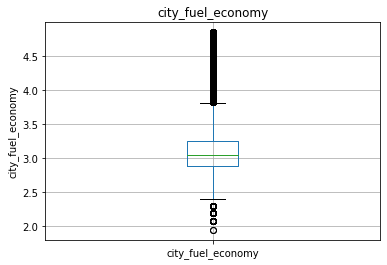

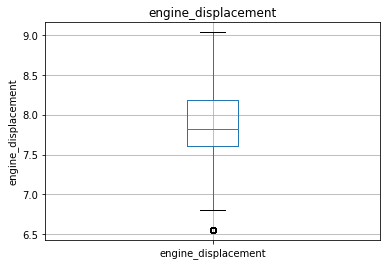

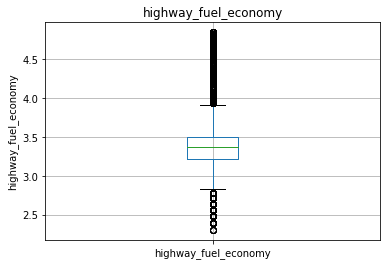

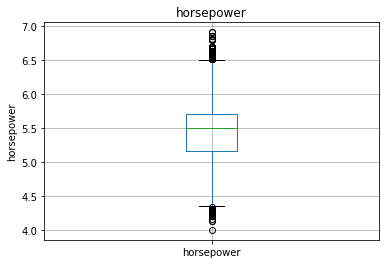

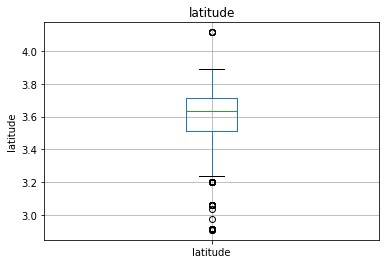

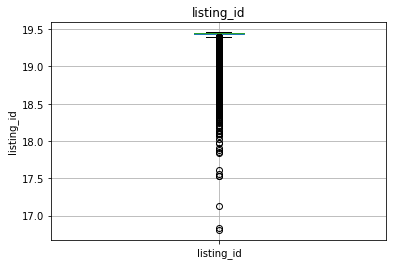

/Users/jingshu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


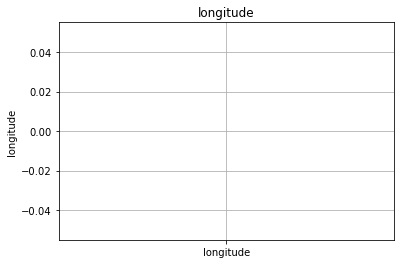

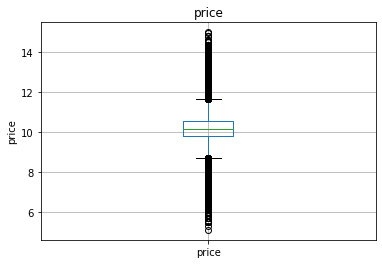

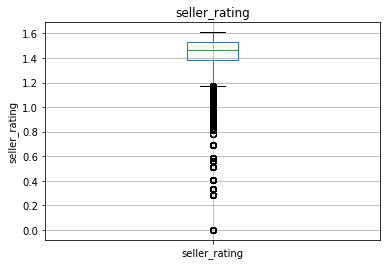

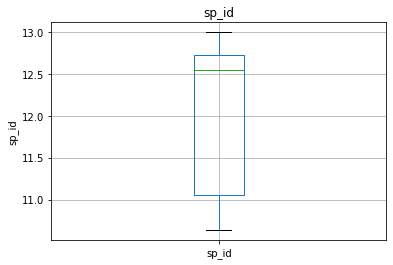

In [18]:
## Outliers

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        

### categorical variables

In [19]:
# list of categorical variables
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O' 
                      and feature not in ['vin']]
# ['vin','listed_date','description','main_picture_url','major_options']
print('Number of categorical variables: ', len(categorical_features))

# visualise the numerical variables
df[categorical_features].head()


Number of categorical variables:  45


,back_legroom,bed,bed_height,bed_length,body_type,cabin,city,dealer_zip,description,engine_cylinders,engine_type,exterior_color,fleet,frame_damaged,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,interior_color,isCab,is_cpo,is_oemcpo,length,listed_date,listing_color,main_picture_url,major_options,make_name,maximum_seating,model_name,power,salvage,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width
0,35.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,Bayamon,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,I4,Solar Yellow,NaN,NaN,Jeep,41.2 in,12.7 gal,Gasoline,NaN,66.5 in,Black,NaN,NaN,NaN,166.6 in,2019-04-06,YELLOW,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5 seats,Renegade,"177 hp @ 5,750 RPM",NaN,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2 in,79.6 in
1,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,I4,Narvik Black,NaN,NaN,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,Black (Ebony),NaN,NaN,NaN,181 in,2020-02-15,BLACK,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,Discovery Sport,"246 hp @ 5,500 RPM",NaN,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in
2,35.4 in,NaN,NaN,NaN,Sedan,NaN,Guaynabo,969,NaN,H4,H4,None,False,False,FIAT,43.3 in,15.9 gal,Gasoline,False,58.1 in,None,False,NaN,NaN,180.9 in,2017-04-25,UNKNOWN,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5 seats,WRX STI,"305 hp @ 6,000 RPM",False,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3 in,78.9 in
3,37.6 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,V6,Eiger Gray,NaN,NaN,Land Rover,39 in,23.5 gal,Gasoline,NaN,73 in,Gray (Ebony/Ebony/Ebony),NaN,NaN,NaN,195.1 in,2020-02-26,GRAY,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7 seats,Discovery,"340 hp @ 6,500 RPM",NaN,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115 in,87.4 in
4,38.1 in,NaN,NaN,NaN,SUV / Crossover,NaN,San Juan,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,I4,Narvik Black,NaN,NaN,Land Rover,39.1 in,17.7 gal,Gasoline,NaN,68 in,Black (Ebony),NaN,NaN,NaN,181 in,2020-04-25,BLACK,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7 seats,Discovery Sport,"246 hp @ 5,500 RPM",NaN,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9 in,85.6 in


In [20]:
for feature in categorical_features:
    print('Feature: %s; Categories: %d' %(feature,len(df[feature].unique())))

Feature: back_legroom; Categories: 220
Feature: bed; Categories: 4
Feature: bed_height; Categories: 2
Feature: bed_length; Categories: 84
Feature: body_type; Categories: 10
Feature: cabin; Categories: 5
Feature: city; Categories: 4687
Feature: dealer_zip; Categories: 9215
Feature: description; Categories: 2519326
Feature: engine_cylinders; Categories: 40
Feature: engine_type; Categories: 40
Feature: exterior_color; Categories: 28666
Feature: fleet; Categories: 3
Feature: frame_damaged; Categories: 3
Feature: franchise_make; Categories: 49
Feature: front_legroom; Categories: 102
Feature: fuel_tank_volume; Categories: 183
Feature: fuel_type; Categories: 9
Feature: has_accidents; Categories: 3
Feature: height; Categories: 473
Feature: interior_color; Categories: 45727
Feature: isCab; Categories: 3
Feature: is_cpo; Categories: 2
Feature: is_oemcpo; Categories: 2
Feature: length; Categories: 837
Feature: listed_date; Categories: 1749
Feature: listing_color; Categories: 15
Feature: main_pict

## Part 2: Data preprocessing

In [74]:
data = dataset.copy(deep=True)

### 2.1 Extract numbers in categorical variables

In [75]:
# split numbers from categorical variables

def splitCategoricalValues(colName):
    l = []
    col = data[colName].tolist()
    for item in col:
        if type(item)==str:
            if item.split()[0]=='--':
                l.append(float('NaN'))
            else:
                l.append(float(item.split()[0]))
        else:
            l.append(float(item))   
            
    return l 


In [76]:
categorical_split_list = ['back_legroom','front_legroom','fuel_tank_volume','height','length','maximum_seating',
                          'wheelbase','width']

for label in categorical_split_list:
    data[label] = splitCategoricalValues(label)
    
data.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
0,ZACNJABB5KPJ92081,35.1,SUV / Crossover,Bayamon,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2,12.7,Gasoline,NaN,66.5,NaN,177.0,Black,NaN,True,18.3988,166.6,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5.0,7.0,Renegade,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9-Speed Automatic Overdrive,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2,79.6,2019
1,SALCJ2FX1LH858117,38.1,SUV / Crossover,San Juan,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,Black (Ebony),NaN,True,18.4439,181.0,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9,85.6,2020
2,JF1VA2M67G9829723,35.4,Sedan,Guaynabo,17.0,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3,15.9,Gasoline,False,58.1,23.0,305.0,None,False,False,18.3467,180.9,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5.0,NaN,WRX STI,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6-Speed Manual,t58994,Base,AWD,All-Wheel Drive,104.3,78.9,2016
3,SALRR2RV0L2433391,37.6,SUV / Crossover,San Juan,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39.0,23.5,Gasoline,NaN,73.0,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,True,18.4439,195.1,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7.0,11.0,Discovery,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8-Speed Automatic Overdrive,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115.0,87.4,2020
4,SALCJ2FXXLH862327,38.1,SUV / Crossover,San Juan,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,Black (Ebony),NaN,True,18.4439,181.0,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7.0,7.0,Discovery Sport,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9-Speed Automatic Overdrive,t86759,S AWD,AWD,All-Wheel Drive,107.9,85.6,2020


In [77]:
# split speed from transmission_display
speed = []

for item in data['transmission_display'].tolist():
    if type(item)== str and '-' in item:
        speed.append(float(item.split('-')[0]))
    else:
        speed.append(float('NaN'))

# put speed in variable "transmission_display"
data['transmission_display'] = speed
print(data['transmission_display'][:5])

0    9.0
1    9.0
2    6.0
3    8.0
4    9.0
Name: transmission_display, dtype: float64


In [78]:
# split 'power' and 'torque'
def splitFeatureToTwo(colName):
    l1 = []
    l2 = []
    for item in data[colName].tolist():
        if type(item)==str and '@' in item:
            l1.append(float(item.split()[0].replace(",", "")))
            l2.append(float(item.split()[3].replace(",", "")))
        else:
            l1.append(float('NaN'))
            l2.append(float('NaN'))
    
    return l1, l2

power_hp, power_RPM = splitFeatureToTwo('power')
torque_lb_ft, torque_RPM = splitFeatureToTwo('torque')

In [79]:
# insert new columns('power_hp', 'power_RPM', 'torque_lb_ft', 'torque_RPM') in dataframe 

df_tmp = pd.DataFrame(power_hp,columns=['power_hp'])
data = pd.concat([data,df_tmp], axis=1)

df_tmp = pd.DataFrame(power_RPM,columns=['power_RPM'])
data = pd.concat([data,df_tmp], axis=1)

df_tmp = pd.DataFrame(torque_lb_ft,columns=['torque_lb_ft'])
data = pd.concat([data,df_tmp], axis=1)

df_tmp = pd.DataFrame(torque_RPM,columns=['torque_RPM'])
data = pd.concat([data,df_tmp], axis=1)

data.head()

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,dealer_zip,description,engine_cylinders,engine_displacement,engine_type,exterior_color,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,interior_color,isCab,is_new,latitude,length,listed_date,listing_color,listing_id,longitude,main_picture_url,major_options,make_name,maximum_seating,mileage,model_name,power,price,salvage,savings_amount,seller_rating,sp_id,sp_name,theft_title,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,ZACNJABB5KPJ92081,35.1,SUV / Crossover,Bayamon,NaN,522,960,[!@@Additional Info@@!]Engine: 2.4L I4 ZERO EV...,I4,1300.0,I4,Solar Yellow,NaN,NaN,True,Jeep,41.2,12.7,Gasoline,NaN,66.5,NaN,177.0,Black,NaN,True,18.3988,166.6,2019-04-06,YELLOW,237132766,-66.1582,https://static.cargurus.com/images/forsale/202...,['Quick Order Package'],Jeep,5.0,7.0,Renegade,"177 hp @ 5,750 RPM",23141.0,NaN,0,2.8,370599.0,Flagship Chrysler,NaN,"200 lb-ft @ 1,750 RPM",A,9.0,t83804,Latitude FWD,FWD,Front-Wheel Drive,101.2,79.6,2019,177.0,5750.0,200.0,1750.0
1,SALCJ2FX1LH858117,38.1,SUV / Crossover,San Juan,NaN,207,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,Black (Ebony),NaN,True,18.4439,181.0,2020-02-15,BLACK,265946296,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7.0,8.0,Discovery Sport,"246 hp @ 5,500 RPM",46500.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9.0,t86759,S AWD,AWD,All-Wheel Drive,107.9,85.6,2020,246.0,5500.0,269.0,1400.0
2,JF1VA2M67G9829723,35.4,Sedan,Guaynabo,17.0,1233,969,NaN,H4,2500.0,H4,None,False,False,True,FIAT,43.3,15.9,Gasoline,False,58.1,23.0,305.0,None,False,False,18.3467,180.9,2017-04-25,UNKNOWN,173473508,-66.1098,NaN,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Subaru,5.0,NaN,WRX STI,"305 hp @ 6,000 RPM",46995.0,False,0,NaN,370467.0,FIAT de San Juan,False,"290 lb-ft @ 4,000 RPM",M,6.0,t58994,Base,AWD,All-Wheel Drive,104.3,78.9,2016,305.0,6000.0,290.0,4000.0
3,SALRR2RV0L2433391,37.6,SUV / Crossover,San Juan,NaN,196,922,"[!@@Additional Info@@!]Fog Lights,7 Seat Packa...",V6,3000.0,V6,Eiger Gray,NaN,NaN,True,Land Rover,39.0,23.5,Gasoline,NaN,73.0,NaN,340.0,Gray (Ebony/Ebony/Ebony),NaN,True,18.4439,195.1,2020-02-26,GRAY,266911050,-66.0785,https://static.cargurus.com/images/forsale/202...,NaN,Land Rover,7.0,11.0,Discovery,"340 hp @ 6,500 RPM",67430.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"332 lb-ft @ 3,500 RPM",A,8.0,t86074,V6 HSE AWD,AWD,All-Wheel Drive,115.0,87.4,2020,340.0,6500.0,332.0,3500.0
4,SALCJ2FXXLH862327,38.1,SUV / Crossover,San Juan,NaN,137,922,"[!@@Additional Info@@!]Keyless Entry,Ebony Mor...",I4,2000.0,I4,Narvik Black,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,Black (Ebony),NaN,True,18.4439,181.0,2020-04-25,BLACK,270957414,-66.0785,https://static.cargurus.com/images/forsale/202...,['Adaptive Cruise Control'],Land Rover,7.0,7.0,Discovery Sport,"246 hp @ 5,500 RPM",48880.0,NaN,0,3.0,389227.0,Land Rover San Juan,NaN,"269 lb-ft @ 1,400 RPM",A,9.0,t86759,S AWD,AWD,All-Wheel Drive,107.9,85.6,2020,246.0,5500.0,269.0,1400.0


In [80]:
for feature in ['power_hp', 'power_RPM', 'torque_lb_ft', 'torque_RPM', 'transmission_display']:
    print('Feature: %s; Categories: %d' %(feature,len(data[feature].unique())))

Feature: power_hp; Categories: 448
Feature: power_RPM; Categories: 96
Feature: torque_lb_ft; Categories: 413
Feature: torque_RPM; Categories: 106
Feature: transmission_display; Categories: 11


In [81]:
data.shape

(3000040, 60)

### 2.2 Drop some categorical variables

In [82]:
# create drop feature list
## 'power' and 'torque' are replaced by 'power_hp', 'power_RPM', 'torque_lb_ft', 'torque_RPM'
## the data of column 'engine_cylinders' and 'engine_type' is the same
## 'exterior_color' and 'interior_color' has too many categories; 'listing_color' is enough
## 'sp_id','sp_name', and 'seller_rating' is related and dependent; drop 'sp_name' and 'seller_rating'
## 'description' and 'main_picture_url' are not related to price
## 'city' and 'dealer_zip' are related and dependent; drop 'dealer_zip'
## 'wheel_system' and 'wheel_system_display' have the same meaning; drop 'wheel_system_display'
## 'trimId' and 'trim_name' are related to each other; drop 'trimId'
## 'major_options' has 279973 unique values (too complicated)
## 'listed_date'

feature_drop_list = ['power', 'torque', 'engine_cylinders', 'exterior_color', 'interior_color', 'sp_name', 
                     'seller_rating', 'main_picture_url', 'description', 'dealer_zip', 'wheel_system_display', 
                     'trimId', 'major_options', 'listed_date', "latitude", 'longitude']
print('drop features:', len(feature_drop_list))
data = data.drop(feature_drop_list, axis=1)
print("\nnew data size: %d * %d" %(data.shape[0], data.shape[1]))
data.head()

drop features: 16

new data size: 3000040 * 44


,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,length,listing_color,listing_id,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,trim_name,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,ZACNJABB5KPJ92081,35.1,SUV / Crossover,Bayamon,NaN,522,1300.0,I4,NaN,NaN,True,Jeep,41.2,12.7,Gasoline,NaN,66.5,NaN,177.0,NaN,True,166.6,YELLOW,237132766,Jeep,5.0,7.0,Renegade,23141.0,NaN,0,370599.0,NaN,A,9.0,Latitude FWD,FWD,101.2,79.6,2019,177.0,5750.0,200.0,1750.0
1,SALCJ2FX1LH858117,38.1,SUV / Crossover,San Juan,NaN,207,2000.0,I4,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,NaN,True,181.0,BLACK,265946296,Land Rover,7.0,8.0,Discovery Sport,46500.0,NaN,0,389227.0,NaN,A,9.0,S AWD,AWD,107.9,85.6,2020,246.0,5500.0,269.0,1400.0
2,JF1VA2M67G9829723,35.4,Sedan,Guaynabo,17.0,1233,2500.0,H4,False,False,True,FIAT,43.3,15.9,Gasoline,False,58.1,23.0,305.0,False,False,180.9,UNKNOWN,173473508,Subaru,5.0,NaN,WRX STI,46995.0,False,0,370467.0,False,M,6.0,Base,AWD,104.3,78.9,2016,305.0,6000.0,290.0,4000.0
3,SALRR2RV0L2433391,37.6,SUV / Crossover,San Juan,NaN,196,3000.0,V6,NaN,NaN,True,Land Rover,39.0,23.5,Gasoline,NaN,73.0,NaN,340.0,NaN,True,195.1,GRAY,266911050,Land Rover,7.0,11.0,Discovery,67430.0,NaN,0,389227.0,NaN,A,8.0,V6 HSE AWD,AWD,115.0,87.4,2020,340.0,6500.0,332.0,3500.0
4,SALCJ2FXXLH862327,38.1,SUV / Crossover,San Juan,NaN,137,2000.0,I4,NaN,NaN,True,Land Rover,39.1,17.7,Gasoline,NaN,68.0,NaN,246.0,NaN,True,181.0,BLACK,270957414,Land Rover,7.0,7.0,Discovery Sport,48880.0,NaN,0,389227.0,NaN,A,9.0,S AWD,AWD,107.9,85.6,2020,246.0,5500.0,269.0,1400.0


### 2.3 Handle missing values

In [83]:
## Step-1: handle categorical features which are missing
## list of categorical variables
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O' and feature not in ['vin']]
print('Number of categorical variables: ', len(categorical_features))

# visualise the categorical variables
data[categorical_features].head()

Number of categorical variables:  17


,body_type,city,engine_type,fleet,frame_damaged,franchise_make,fuel_type,has_accidents,isCab,listing_color,make_name,model_name,salvage,theft_title,transmission,trim_name,wheel_system
0,SUV / Crossover,Bayamon,I4,NaN,NaN,Jeep,Gasoline,NaN,NaN,YELLOW,Jeep,Renegade,NaN,NaN,A,Latitude FWD,FWD
1,SUV / Crossover,San Juan,I4,NaN,NaN,Land Rover,Gasoline,NaN,NaN,BLACK,Land Rover,Discovery Sport,NaN,NaN,A,S AWD,AWD
2,Sedan,Guaynabo,H4,False,False,FIAT,Gasoline,False,False,UNKNOWN,Subaru,WRX STI,False,False,M,Base,AWD
3,SUV / Crossover,San Juan,V6,NaN,NaN,Land Rover,Gasoline,NaN,NaN,GRAY,Land Rover,Discovery,NaN,NaN,A,V6 HSE AWD,AWD
4,SUV / Crossover,San Juan,I4,NaN,NaN,Land Rover,Gasoline,NaN,NaN,BLACK,Land Rover,Discovery Sport,NaN,NaN,A,S AWD,AWD


In [84]:

categorical_with_nan=[feature for feature in categorical_features if data[feature].isnull().sum()>1]
print('Categorical features with missing values:', len(categorical_with_nan))

for feature in categorical_features:
    print(feature, ': ', np.around(data[feature].isnull().mean()*100,4), '% missing value')

Categorical features with missing values: 13
body_type :  0.4514 % missing value
city :  0.0 % missing value
engine_type :  3.3527 % missing value
fleet :  47.5525 % missing value
frame_damaged :  47.5525 % missing value
franchise_make :  19.0876 % missing value
fuel_type :  2.7574 % missing value
has_accidents :  47.5525 % missing value
isCab :  47.5525 % missing value
listing_color :  0.0 % missing value
make_name :  0.0 % missing value
model_name :  0.0 % missing value
salvage :  47.5525 % missing value
theft_title :  47.5525 % missing value
transmission :  2.1395 % missing value
trim_name :  3.8764 % missing value
wheel_system :  4.891 % missing value


In [85]:
# replace categorical missing value with a new label 'Missing'
def replace_cat_feature(dataset,features_nan):
    data_tmp=dataset.copy()
    print(data_tmp.shape)
    data_tmp[features_nan]=data_tmp[features_nan].fillna('Missing')
    return data_tmp

data=replace_cat_feature(data,categorical_with_nan)

print(data[categorical_with_nan].isnull().sum())

print("\nData size: %d * %d" %(data.shape[0], data.shape[1]))

(3000040, 44)
body_type         0
engine_type       0
fleet             0
frame_damaged     0
franchise_make    0
fuel_type         0
has_accidents     0
isCab             0
salvage           0
theft_title       0
transmission      0
trim_name         0
wheel_system      0
dtype: int64

Data size: 3000040 * 44


In [86]:
## Step-2: handle numerical features which are missing
# list of numerical variables
numerical_features = [feature for feature in data.columns if data[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
data[numerical_features].head()

print("\nData size: %d * %d" %(data.shape[0], data.shape[1]))

Number of numerical variables:  26

Data size: 3000040 * 44


In [87]:
## check for numerical variables that contain missing values
numerical_with_nan=[feature for feature in data.columns if data[feature].isnull().sum()>1 and data[feature].dtypes!='O']

## print the numerical nan variables and percentage of missing values
print('Numerical features with missing values:', len(numerical_with_nan))
for feature in numerical_with_nan:
    print(feature, ': ', np.around(data[feature].isnull().mean()*100,4), '% missing value')


Numerical features with missing values: 19
back_legroom :  8.0908 % missing value
city_fuel_economy :  16.3759 % missing value
engine_displacement :  5.7461 % missing value
front_legroom :  5.8485 % missing value
fuel_tank_volume :  5.3558 % missing value
height :  5.3245 % missing value
highway_fuel_economy :  16.3759 % missing value
horsepower :  5.7461 % missing value
length :  5.3241 % missing value
maximum_seating :  5.3256 % missing value
mileage :  4.8128 % missing value
sp_id :  0.0032 % missing value
transmission_display :  59.7031 % missing value
wheelbase :  5.3233 % missing value
width :  5.3249 % missing value
power_hp :  16.0474 % missing value
power_RPM :  16.0474 % missing value
torque_lb_ft :  17.2596 % missing value
torque_RPM :  17.2596 % missing value


In [88]:
## replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=data[feature].median()
    
    # create a new feature to capture nan values
#     data[feature+'nan']=np.where(data[feature].isnull(),1,0)
    data[feature].fillna(median_value,inplace=True)
    
print(data[numerical_with_nan].isnull().sum())

print("\nData size: %d * %d" %(data.shape[0], data.shape[1]))

back_legroom            0
city_fuel_economy       0
engine_displacement     0
front_legroom           0
fuel_tank_volume        0
height                  0
highway_fuel_economy    0
horsepower              0
length                  0
maximum_seating         0
mileage                 0
sp_id                   0
transmission_display    0
wheelbase               0
width                   0
power_hp                0
power_RPM               0
torque_lb_ft            0
torque_RPM              0
dtype: int64

Data size: 3000040 * 44


In [89]:
data.head(50)

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,length,listing_color,listing_id,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,trim_name,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,ZACNJABB5KPJ92081,35.1,SUV / Crossover,Bayamon,21.0,522,1300.0,I4,Missing,Missing,True,Jeep,41.2,12.7,Gasoline,Missing,66.5,29.0,177.0,Missing,True,166.6,YELLOW,237132766,Jeep,5.0,7.0,Renegade,23141.0,Missing,0,370599.0,Missing,A,9.0,Latitude FWD,FWD,101.2,79.6,2019,177.0,5750.0,200.0,1750.0
1,SALCJ2FX1LH858117,38.1,SUV / Crossover,San Juan,21.0,207,2000.0,I4,Missing,Missing,True,Land Rover,39.1,17.7,Gasoline,Missing,68.0,29.0,246.0,Missing,True,181.0,BLACK,265946296,Land Rover,7.0,8.0,Discovery Sport,46500.0,Missing,0,389227.0,Missing,A,9.0,S AWD,AWD,107.9,85.6,2020,246.0,5500.0,269.0,1400.0
2,JF1VA2M67G9829723,35.4,Sedan,Guaynabo,17.0,1233,2500.0,H4,False,False,True,FIAT,43.3,15.9,Gasoline,False,58.1,23.0,305.0,False,False,180.9,UNKNOWN,173473508,Subaru,5.0,8267.0,WRX STI,46995.0,False,0,370467.0,False,M,6.0,Base,AWD,104.3,78.9,2016,305.0,6000.0,290.0,4000.0
3,SALRR2RV0L2433391,37.6,SUV / Crossover,San Juan,21.0,196,3000.0,V6,Missing,Missing,True,Land Rover,39.0,23.5,Gasoline,Missing,73.0,29.0,340.0,Missing,True,195.1,GRAY,266911050,Land Rover,7.0,11.0,Discovery,67430.0,Missing,0,389227.0,Missing,A,8.0,V6 HSE AWD,AWD,115.0,87.4,2020,340.0,6500.0,332.0,3500.0
4,SALCJ2FXXLH862327,38.1,SUV / Crossover,San Juan,21.0,137,2000.0,I4,Missing,Missing,True,Land Rover,39.1,17.7,Gasoline,Missing,68.0,29.0,246.0,Missing,True,181.0,BLACK,270957414,Land Rover,7.0,7.0,Discovery Sport,48880.0,Missing,0,389227.0,Missing,A,9.0,S AWD,AWD,107.9,85.6,2020,246.0,5500.0,269.0,1400.0
5,SALYK2EX1LA261711,37.1,SUV / Crossover,San Juan,21.0,242,2000.0,I4,False,False,True,Land Rover,40.2,16.6,Gasoline,False,66.3,29.0,247.0,False,True,188.9,UNKNOWN,262940541,Land Rover,5.0,12.0,Range Rover Velar,66903.0,False,0,389227.0,False,A,8.0,P250 R-Dynamic S AWD,AWD,113.1,84.4,2020,247.0,5500.0,269.0,1200.0
6,3MZBPABL6KM107908,35.1,Sedan,Bayamon,21.0,447,2500.0,I4,Missing,Missing,True,Jeep,42.3,13.2,Gasoline,Missing,56.9,29.0,186.0,Missing,True,183.5,SILVER,244110426,Mazda,5.0,14.0,MAZDA3,23695.0,Missing,0,370599.0,Missing,A,6.0,Sedan FWD,FWD,107.3,70.7,2019,186.0,6000.0,186.0,4000.0
7,SALYK2EX5LA275434,37.1,SUV / Crossover,San Juan,21.0,70,2000.0,I4,Missing,Missing,True,Land Rover,40.2,16.6,Gasoline,Missing,66.3,29.0,247.0,Missing,True,188.9,WHITE,275458784,Land Rover,5.0,11.0,Range Rover Velar,68520.0,Missing,0,389227.0,Missing,A,8.0,P250 R-Dynamic S AWD,AWD,113.1,84.4,2020,247.0,5500.0,269.0,1200.0
8,SALCJ2FX6LH858128,38.1,SUV / Crossover,San Juan,21.0,196,2000.0,I4,Missing,Missing,True,Land Rover,39.1,17.7,Gasoline,Missing,68.0,29.0,246.0,Missing,True,181.0,GRAY,266911040,Land Rover,7.0,8.0,Discovery Sport,51245.0,Missing,0,389227.0,Missing,A,9.0,S AWD,AWD,107.9,85.6,2020,246.0,5500.0,269.0,1400.0
9,SALZL2GX4LH007593,33.8,SUV / Crossover,San Juan,21.0,510,2000.0,I4,False,False,True,Land Rover,40.0,17.7,Gasoline,False,64.9,29.0,296.0,False,False,172.1,WHITE,238225156,Land Rover,5.0,254.0,Range Rover Evoque,84399.0,False,0,389227.0,False,A,9.0,P300 R-Dynamic SE AWD,AWD,105.6,82.7,2020,296.0,5500.0,295.0,1600.0


### 2.4 Handle rare categorical variables

In [90]:
# replace categorical variables that are present less than 1% of the observations with 'Rare_var'
for feature in categorical_features:
    temp=data.groupby(feature)['price'].count()/len(data)
    temp_df=temp[temp>0.01].index
    data[feature]=np.where(data[feature].isin(temp_df),data[feature],'Rare_var')

# visualise the categorical variables
data[categorical_features].head(50)

,body_type,city,engine_type,fleet,frame_damaged,franchise_make,fuel_type,has_accidents,isCab,listing_color,make_name,model_name,salvage,theft_title,transmission,trim_name,wheel_system
0,SUV / Crossover,Rare_var,I4,Missing,Missing,Jeep,Gasoline,Missing,Missing,Rare_var,Jeep,Rare_var,Missing,Missing,A,Rare_var,FWD
1,SUV / Crossover,Rare_var,I4,Missing,Missing,Rare_var,Gasoline,Missing,Missing,BLACK,Rare_var,Rare_var,Missing,Missing,A,Rare_var,AWD
2,Sedan,Rare_var,H4,False,False,Rare_var,Gasoline,False,False,UNKNOWN,Subaru,Rare_var,False,False,M,Rare_var,AWD
3,SUV / Crossover,Rare_var,V6,Missing,Missing,Rare_var,Gasoline,Missing,Missing,GRAY,Rare_var,Rare_var,Missing,Missing,A,Rare_var,AWD
4,SUV / Crossover,Rare_var,I4,Missing,Missing,Rare_var,Gasoline,Missing,Missing,BLACK,Rare_var,Rare_var,Missing,Missing,A,Rare_var,AWD
5,SUV / Crossover,Rare_var,I4,False,False,Rare_var,Gasoline,False,False,UNKNOWN,Rare_var,Rare_var,False,False,A,Rare_var,AWD
6,Sedan,Rare_var,I4,Missing,Missing,Jeep,Gasoline,Missing,Missing,SILVER,Mazda,Rare_var,Missing,Missing,A,Rare_var,FWD
7,SUV / Crossover,Rare_var,I4,Missing,Missing,Rare_var,Gasoline,Missing,Missing,WHITE,Rare_var,Rare_var,Missing,Missing,A,Rare_var,AWD
8,SUV / Crossover,Rare_var,I4,Missing,Missing,Rare_var,Gasoline,Missing,Missing,GRAY,Rare_var,Rare_var,Missing,Missing,A,Rare_var,AWD
9,SUV / Crossover,Rare_var,I4,False,False,Rare_var,Gasoline,False,False,WHITE,Rare_var,Rare_var,False,False,A,Rare_var,AWD


In [91]:
for feature in categorical_features:
    labels_ordered=data.groupby([feature])['price'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

In [92]:
data.head(50)

,vin,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,length,listing_color,listing_id,make_name,maximum_seating,mileage,model_name,price,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,trim_name,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,ZACNJABB5KPJ92081,35.1,5,0,21.0,522,1300.0,0,2,2,True,12,41.2,12.7,2,2,66.5,29.0,177.0,2,True,166.6,0,237132766,12,5.0,7.0,15,23141.0,2,0,370599.0,2,3,9.0,9,0,101.2,79.6,2019,177.0,5750.0,200.0,1750.0
1,SALCJ2FX1LH858117,38.1,5,0,21.0,207,2000.0,0,2,2,True,15,39.1,17.7,2,2,68.0,29.0,246.0,2,True,181.0,5,265946296,21,7.0,8.0,15,46500.0,2,0,389227.0,2,3,9.0,9,1,107.9,85.6,2020,246.0,5500.0,269.0,1400.0
2,JF1VA2M67G9829723,35.4,2,0,17.0,1233,2500.0,3,1,1,True,15,43.3,15.9,2,1,58.1,23.0,305.0,1,False,180.9,7,173473508,8,5.0,8267.0,15,46995.0,1,0,370467.0,1,1,6.0,9,1,104.3,78.9,2016,305.0,6000.0,290.0,4000.0
3,SALRR2RV0L2433391,37.6,5,0,21.0,196,3000.0,6,2,2,True,15,39.0,23.5,2,2,73.0,29.0,340.0,2,True,195.1,3,266911050,21,7.0,11.0,15,67430.0,2,0,389227.0,2,3,8.0,9,1,115.0,87.4,2020,340.0,6500.0,332.0,3500.0
4,SALCJ2FXXLH862327,38.1,5,0,21.0,137,2000.0,0,2,2,True,15,39.1,17.7,2,2,68.0,29.0,246.0,2,True,181.0,5,270957414,21,7.0,7.0,15,48880.0,2,0,389227.0,2,3,9.0,9,1,107.9,85.6,2020,246.0,5500.0,269.0,1400.0
5,SALYK2EX1LA261711,37.1,5,0,21.0,242,2000.0,0,1,1,True,15,40.2,16.6,2,1,66.3,29.0,247.0,1,True,188.9,7,262940541,21,5.0,12.0,15,66903.0,1,0,389227.0,1,3,8.0,9,1,113.1,84.4,2020,247.0,5500.0,269.0,1200.0
6,3MZBPABL6KM107908,35.1,2,0,21.0,447,2500.0,0,2,2,True,12,42.3,13.2,2,2,56.9,29.0,186.0,2,True,183.5,1,244110426,6,5.0,14.0,15,23695.0,2,0,370599.0,2,3,6.0,9,0,107.3,70.7,2019,186.0,6000.0,186.0,4000.0
7,SALYK2EX5LA275434,37.1,5,0,21.0,70,2000.0,0,2,2,True,15,40.2,16.6,2,2,66.3,29.0,247.0,2,True,188.9,6,275458784,21,5.0,11.0,15,68520.0,2,0,389227.0,2,3,8.0,9,1,113.1,84.4,2020,247.0,5500.0,269.0,1200.0
8,SALCJ2FX6LH858128,38.1,5,0,21.0,196,2000.0,0,2,2,True,15,39.1,17.7,2,2,68.0,29.0,246.0,2,True,181.0,3,266911040,21,7.0,8.0,15,51245.0,2,0,389227.0,2,3,9.0,9,1,107.9,85.6,2020,246.0,5500.0,269.0,1400.0
9,SALZL2GX4LH007593,33.8,5,0,21.0,510,2000.0,0,1,1,True,15,40.0,17.7,2,1,64.9,29.0,296.0,1,False,172.1,6,238225156,21,5.0,254.0,15,84399.0,1,0,389227.0,1,3,9.0,9,1,105.6,82.7,2020,296.0,5500.0,295.0,1600.0


In [93]:
data.shape

(3000040, 44)

In [94]:
data = data.drop(['vin'], axis=1)
data.shape

(3000040, 43)

In [95]:
data.to_csv('dataset.csv',index=False)

### 2.5 Feature scaling

In [96]:

feature_scale=[feature for feature in data.columns if feature not in ['vin','price'] and 'nan' not in feature]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[feature_scale])


MinMaxScaler()

In [97]:
scaler.transform(data[feature_scale])

array([[0.58695652, 0.625     , 0.        , ..., 0.61692598, 0.16027088,
        0.21232877],
       [0.63712375, 0.625     , 0.        , ..., 0.58745875, 0.23814898,
        0.16438356],
       [0.59197324, 0.25      , 0.        , ..., 0.64639321, 0.26185102,
        0.52054795],
       ...,
       [0.64046823, 0.25      , 0.        , ..., 0.58745875, 0.23927765,
        0.21232877],
       [0.58528428, 0.25      , 0.        , ..., 0.41065535, 0.29345372,
        0.21232877],
       [0.63377926, 0.625     , 0.        , ..., 0.64639321, 0.13205418,
        0.57534247]])

In [99]:
# transform the train and test set, and add on the Id and SalePrice variables
dataframe = pd.concat([data[['price']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(data[feature_scale]), columns=feature_scale)],
                    axis=1)

In [100]:
dataframe.head()

,price,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,length,listing_color,listing_id,make_name,maximum_seating,mileage,model_name,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,trim_name,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,23141.0,0.586957,0.625,0.0,0.116667,0.145040,0.077922,0.000000,1.0,1.0,1.0,0.631579,0.614925,0.173913,0.4,1.0,0.310391,0.162393,0.128964,1.0,1.0,0.321809,0.000000,0.828716,0.521739,0.230769,7.000001e-08,0.75,1.0,0.0,0.823837,1.0,0.75,0.888889,0.818182,0.0,0.211450,0.557895,0.981132,0.128964,0.616926,0.160271,0.212329
1,46500.0,0.637124,0.625,0.0,0.116667,0.057516,0.168831,0.000000,1.0,1.0,1.0,0.789474,0.583582,0.254428,0.4,1.0,0.330634,0.162393,0.201903,1.0,1.0,0.398404,0.714286,0.938659,0.913043,0.384615,8.000001e-08,0.75,1.0,0.0,0.870482,1.0,0.75,0.888889,0.818182,0.2,0.262595,0.648120,0.990566,0.201903,0.587459,0.238149,0.164384
2,46995.0,0.591973,0.250,0.0,0.083333,0.342595,0.233766,0.333333,0.5,0.5,1.0,0.789474,0.646269,0.225443,0.4,0.5,0.197031,0.111111,0.264271,0.5,0.0,0.397872,1.000000,0.585812,0.347826,0.230769,8.267001e-05,0.75,0.5,0.0,0.823507,0.5,0.25,0.555556,0.818182,0.2,0.235115,0.547368,0.952830,0.264271,0.646393,0.261851,0.520548
3,67430.0,0.628763,0.625,0.0,0.116667,0.054460,0.298701,0.666667,1.0,1.0,1.0,0.789474,0.582090,0.347826,0.4,1.0,0.398111,0.162393,0.301268,1.0,1.0,0.473404,0.428571,0.942341,0.913043,0.384615,1.100000e-07,0.75,1.0,0.0,0.870482,1.0,0.75,0.777778,0.818182,0.2,0.316794,0.675188,0.990566,0.301268,0.705328,0.309255,0.452055
4,48880.0,0.637124,0.625,0.0,0.116667,0.038066,0.168831,0.000000,1.0,1.0,1.0,0.789474,0.583582,0.254428,0.4,1.0,0.330634,0.162393,0.201903,1.0,1.0,0.398404,0.714286,0.957780,0.913043,0.384615,7.000001e-08,0.75,1.0,0.0,0.870482,1.0,0.75,0.888889,0.818182,0.2,0.262595,0.648120,0.990566,0.201903,0.587459,0.238149,0.164384


In [101]:
dataframe.to_csv('train.csv',index=False)

## Part 3: Build Model

In [102]:
import time
import numpy as np
import pandas as pd

# read in the dataset
start = time.time()
df3 = pd.read_csv('train.csv')

print("Time taken to read dataset: %f seconds" % (time.time()-start))

print("The first five rows of dataset:")
df3.head()

Time taken to read dataset: 12.074895 seconds
The first five rows of dataset:


,price,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,length,listing_color,listing_id,make_name,maximum_seating,mileage,model_name,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,trim_name,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
0,23141.0,0.586957,0.625,0.0,0.116667,0.145040,0.077922,0.000000,1.0,1.0,1.0,0.631579,0.614925,0.173913,0.4,1.0,0.310391,0.162393,0.128964,1.0,1.0,0.321809,0.000000,0.828716,0.521739,0.230769,7.000001e-08,0.75,1.0,0.0,0.823837,1.0,0.75,0.888889,0.818182,0.0,0.211450,0.557895,0.981132,0.128964,0.616926,0.160271,0.212329
1,46500.0,0.637124,0.625,0.0,0.116667,0.057516,0.168831,0.000000,1.0,1.0,1.0,0.789474,0.583582,0.254428,0.4,1.0,0.330634,0.162393,0.201903,1.0,1.0,0.398404,0.714286,0.938659,0.913043,0.384615,8.000001e-08,0.75,1.0,0.0,0.870482,1.0,0.75,0.888889,0.818182,0.2,0.262595,0.648120,0.990566,0.201903,0.587459,0.238149,0.164384
2,46995.0,0.591973,0.250,0.0,0.083333,0.342595,0.233766,0.333333,0.5,0.5,1.0,0.789474,0.646269,0.225443,0.4,0.5,0.197031,0.111111,0.264271,0.5,0.0,0.397872,1.000000,0.585812,0.347826,0.230769,8.267001e-05,0.75,0.5,0.0,0.823507,0.5,0.25,0.555556,0.818182,0.2,0.235115,0.547368,0.952830,0.264271,0.646393,0.261851,0.520548
3,67430.0,0.628763,0.625,0.0,0.116667,0.054460,0.298701,0.666667,1.0,1.0,1.0,0.789474,0.582090,0.347826,0.4,1.0,0.398111,0.162393,0.301268,1.0,1.0,0.473404,0.428571,0.942341,0.913043,0.384615,1.100000e-07,0.75,1.0,0.0,0.870482,1.0,0.75,0.777778,0.818182,0.2,0.316794,0.675188,0.990566,0.301268,0.705328,0.309255,0.452055
4,48880.0,0.637124,0.625,0.0,0.116667,0.038066,0.168831,0.000000,1.0,1.0,1.0,0.789474,0.583582,0.254428,0.4,1.0,0.330634,0.162393,0.201903,1.0,1.0,0.398404,0.714286,0.957780,0.913043,0.384615,7.000001e-08,0.75,1.0,0.0,0.870482,1.0,0.75,0.888889,0.818182,0.2,0.262595,0.648120,0.990566,0.201903,0.587459,0.238149,0.164384


### Train and test data splitting

In [103]:
from sklearn.model_selection import train_test_split

feature_train = [feature for feature in df3.columns if feature not in ['vin','price']]
X = df3[feature_train]
y = df3['price']

# divide the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(len(y_train))

2400032


### Model 1: LinearRegression

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lregr = LinearRegression()
lregr.fit(X_train, y_train)
train_pred_l = lregr.predict(X_train)
test_pred_l = lregr.predict(X_test)

mse_l_train = mean_squared_error(y_train, train_pred_l)
print("Train MSE: ", mse_l_train)

mse_l_test = mean_squared_error(y_test, test_pred_l)
print("Test MSE: ", mse_l_test)


Train MSE:  145820628.44928694
Test MSE:  432335691.93609893


### Model 2: RandomForestRegressor

In [105]:
# Sample a portion of the rows

df4 = df3.sample(frac=0.30, replace=False)
print(df4.shape)
df4.head()

(900012, 43)


,price,back_legroom,body_type,city,city_fuel_economy,daysonmarket,engine_displacement,engine_type,fleet,frame_damaged,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,has_accidents,height,highway_fuel_economy,horsepower,isCab,is_new,length,listing_color,listing_id,make_name,maximum_seating,mileage,model_name,salvage,savings_amount,sp_id,theft_title,transmission,transmission_display,trim_name,wheel_system,wheelbase,width,year,power_hp,power_RPM,torque_lb_ft,torque_RPM
1445942,12990.0,0.707358,0.250,0.0,0.058333,0.019450,0.623377,0.888889,0.5,0.5,0.0,0.000000,0.625373,0.352657,0.4,0.5,0.195682,0.102564,0.345666,0.5,0.0,0.526064,0.142857,0.975605,1.000000,0.230769,0.001172,0.75,0.5,0.009809,0.695123,0.5,0.75,0.666667,0.818182,0.4,0.390076,0.469173,0.867925,0.345666,0.646393,0.375847,0.356164
453885,24775.0,0.632107,0.625,0.0,0.116667,0.067797,0.233766,0.000000,1.0,1.0,1.0,0.473684,0.611940,0.202899,0.4,1.0,0.317139,0.162393,0.156448,1.0,1.0,0.397872,1.000000,0.926363,0.391304,0.230769,0.000000,0.55,1.0,0.000000,0.607818,1.0,0.75,0.555556,0.636364,0.0,0.247328,0.458647,0.990566,0.206131,0.646393,0.225734,0.520548
1965006,4990.0,0.632107,0.250,0.0,0.091667,0.056960,0.298701,0.666667,0.5,0.5,0.0,0.000000,0.620896,0.259259,0.4,0.5,0.199730,0.136752,0.144820,0.5,0.0,0.442021,0.714286,0.939636,0.391304,0.230769,0.001247,0.30,0.5,0.001051,0.867139,0.5,0.75,0.333333,0.818182,0.0,0.256489,0.424060,0.820755,0.144820,0.563885,0.170429,0.575342
1648609,52948.0,0.565217,0.625,0.0,0.108333,0.005279,0.168831,0.000000,0.0,0.5,1.0,0.421053,0.597015,0.254428,0.4,0.5,0.288799,0.145299,0.201903,0.0,0.0,0.351064,0.857143,0.992708,0.913043,0.230769,0.000056,0.75,0.5,0.040708,0.660485,0.5,0.75,0.888889,0.818182,0.2,0.245038,0.604511,0.990566,0.201903,0.587459,0.238149,0.164384
17425,4995.0,0.605351,0.250,0.0,0.141667,0.024173,0.168831,0.000000,0.0,0.0,0.0,0.000000,0.626866,0.202899,0.4,0.5,0.194332,0.196581,0.094080,0.5,0.0,0.393085,0.857143,0.969688,0.260870,0.230769,0.001130,0.75,0.5,0.000000,0.985076,0.5,0.75,0.444444,0.818182,0.0,0.232061,0.400000,0.905660,0.094080,0.705328,0.083521,0.589041


In [106]:
X2 = df4[feature_train]
y2 = df4['price']

# divide the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 42)

print(len(y2_train))

720009


In [107]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rfregr = RandomForestRegressor(n_estimators=100, random_state=42)
rfregr.fit(X2_train, y2_train)
train_pred_rf = rfregr.predict(X2_train)
test_pred_rf = rfregr.predict(X2_test)

mse_rf_train = mean_squared_error(y2_train, train_pred_rf)
print("Train MSE: ", mse_rf_train)
print("Train RMSE: ", mse_rf_train*(1/2.0))

mse_rf_test = mean_squared_error(y2_test, test_pred_rf)
print("Test MSE: ", mse_rf_test)
print("Test RMSE: ", mse_rf_test*(1/2.0))

Train MSE:  7615242.894199782
Train RMSE:  3807621.447099891
Test MSE:  27134300.431456
Test RMSE:  13567150.215728


In [109]:
# feature importance analysis

feature_imp = pd.Series(rfregr.feature_importances_).sort_values(ascending=False)
print(feature_imp[feature_imp>0.0])
feature_idx_list = feature_imp[feature_imp>0.0].index
feature_idx = np.array(feature_idx_list)
print("Selected features:", feature_idx.shape[0])
print("Selected feature indices:", feature_idx)

17    0.403404
37    0.141848
25    0.110484
23    0.041516
15    0.034663
38    0.024751
35    0.022717
22    0.019616
6     0.017501
10    0.017223
29    0.017171
4     0.012960
34    0.011917
24    0.008966
13    0.008612
5     0.007713
28    0.007452
36    0.006831
12    0.006811
20    0.006777
0     0.006590
40    0.006427
3     0.005925
1     0.005885
21    0.005853
16    0.005632
41    0.005405
33    0.005121
26    0.004268
39    0.003554
31    0.003254
11    0.003229
32    0.002675
19    0.002315
14    0.001784
27    0.000613
18    0.000576
7     0.000497
2     0.000377
8     0.000377
9     0.000358
30    0.000357
dtype: float64
Selected features: 42
Selected feature indices: [17 37 25 23 15 38 35 22  6 10 29  4 34 24 13  5 28 36 12 20  0 40  3  1
 21 16 41 33 26 39 31 11 32 19 14 27 18  7  2  8  9 30]


In [110]:
print('Top 5 important features: ')
for i in feature_idx_list[:5]:
    print(feature_train[i])

Top 5 important features: 
horsepower
year
mileage
make_name
height


In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import mean_squared_error

# rfregr2 = RandomForestRegressor(n_estimators=200, random_state=42)
# rfregr2.fit(X2_train, y2_train)
# train_pred_rf2 = rfregr2.predict(X2_train)
# test_pred_rf2 = rfregr2.predict(X2_test)

# mse_rf_train2 = mean_squared_error(y2_train, train_pred_rf2)
# print("Train MSE: ", mse_rf_train2)
# print("Train RMSE: ", mse_rf_train2*(1/2.0))

# mse_rf_test2 = mean_squared_error(y2_test, test_pred_rf2)
# print("Test MSE: ", mse_rf_test2)
# print("Test RMSE: ", mse_rf_test2*(1/2.0))